In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy as sp
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

### SLR With SFS (n=1) ###

In [3]:
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
y=base.SalePrice
X=base.drop('SalePrice', axis=1)

In [5]:
simple = LinearRegression()

In [6]:
sfs_foreward = SequentialFeatureSelector(
    simple, n_features_to_select=1, direction="forward"
).fit(X, y)

In [7]:
selected = X.columns[sfs_foreward.get_support()]
selected

Index(['OverallQual'], dtype='object')

In [8]:
X = base[selected]
X.head(3)

,OverallQual
0,6
1,5
2,5


In [9]:
simple.fit(X,y)

LinearRegression()

In [10]:
simple.score(X,y)

0.6248925373371652

In [11]:
X = base[selected].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)

In [12]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [13]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [14]:
SLR = evaluate_model(simple, X,y)
SLR

,fit_time,score_time,test_r2,test_neg_mae
0,0.001345,0.000386,0.601363,-34340.886374
1,0.001486,0.000485,0.604992,-31981.389047
2,0.001427,0.000427,0.631919,-32759.791911
3,0.001362,0.000408,0.612772,-31660.319528
4,0.001386,0.000466,0.664951,-31736.539341
5,0.001319,0.000402,0.620319,-34492.081338
6,0.001472,0.000445,0.654626,-29706.637430
7,0.001226,0.000338,0.612257,-31577.831206
8,0.000757,0.000329,0.645844,-31812.568471
9,0.001564,0.000359,0.592861,-34796.586668


In [15]:
#SLR = SLR[0][['test_r2', 'test_neg_mae']]
SLR = SLR.assign(MAE = SLR['test_neg_mae'].abs())
SLR = SLR.rename(columns = {'test_r2':'SLR R2 Qual', 'MAE':'SLR MAE Qual'})
SLR

,fit_time,score_time,SLR R2 Qual,test_neg_mae,SLR MAE Qual
0,0.001345,0.000386,0.601363,-34340.886374,34340.886374
1,0.001486,0.000485,0.604992,-31981.389047,31981.389047
2,0.001427,0.000427,0.631919,-32759.791911,32759.791911
3,0.001362,0.000408,0.612772,-31660.319528,31660.319528
4,0.001386,0.000466,0.664951,-31736.539341,31736.539341
5,0.001319,0.000402,0.620319,-34492.081338,34492.081338
6,0.001472,0.000445,0.654626,-29706.637430,29706.637430
7,0.001226,0.000338,0.612257,-31577.831206,31577.831206
8,0.000757,0.000329,0.645844,-31812.568471,31812.568471
9,0.001564,0.000359,0.592861,-34796.586668,34796.586668


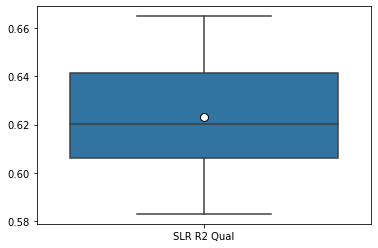

In [16]:
sns.boxplot(data=SLR[['SLR R2 Qual']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [17]:
SLR.describe()

,fit_time,score_time,SLR R2 Qual,test_neg_mae,SLR MAE Qual
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.001424,0.000515,0.622983,-32489.244046,32489.244046
std,0.000360,0.000251,0.023780,1313.989441,1313.989441
min,0.000722,0.000326,0.582898,-34796.586668,29706.637430
25%,0.001332,0.000372,0.606316,-32929.759266,31774.553906
50%,0.001427,0.000409,0.620319,-32107.545641,32107.545641
75%,0.001545,0.000475,0.641334,-31774.553906,32929.759266
max,0.002052,0.001107,0.664951,-29706.637430,34796.586668


In [18]:
SLR.to_csv('SLR_Qual.csv', index=False)

In [19]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

In [20]:
r2

0.6248925373371652

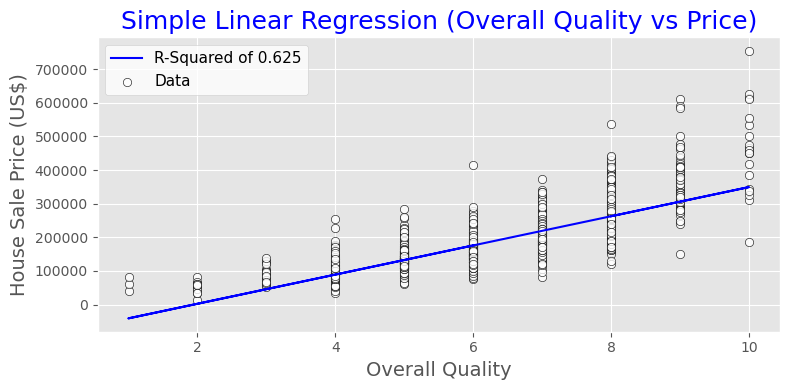

In [21]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.625')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Overall Quality vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()